In [29]:
import pandas as pd
from collections import Counter
import numpy as np
import os

In [30]:
RESULTS_FOLDER = '5MS_LATENCY_RESULTS'

In [31]:
FILES = []
for file in os.listdir(RESULTS_FOLDER):
    print(file)
    FILES.append(file)

mnist250_3c_640s_1566814259.csv
mnist250_5c_640s_1566814326.csv
mnist250_2c_640s_1566814233.csv
mnist250_7c_640s_1566814424.csv
mnist250_10c_640s_1566814804.csv
mnist250_4c_640s_1566814289.csv
mnist250_9c_640s_1566814622.csv
mnist250_6c_640s_1566814369.csv
mnist250_8c_640s_1566814490.csv


In [32]:
LABELED_RESULTS = []
UNLABELED_RESULTS = []

for f in FILES:
    
    print(f)
    df = pd.read_csv(os.path.join(RESULTS_FOLDER, f))
    
    # Percentage of unlabeled samples
    #unlabeled_ratio = df.groupby('Label')['Sample ID'].nunique()[-1] / len(df)
    #print(unlabeled_ratio)
    
    # Mean time elapsed per unlabeled data samples
    unlabeled_mean = df.groupby('Label')['Time elapsed'].mean()[-1]
    UNLABELED_RESULTS.append(unlabeled_mean)
    print(unlabeled_mean)
    
    # Mean time elapsed per labeled data samples
    labeled_mean = np.mean( list( set(list(df.groupby('Label')['Time elapsed'].mean())) - set([unlabeled_mean]) ) )
    LABELED_RESULTS.append(labeled_mean)
    print(labeled_mean)
    
    print('------------------')

mnist250_3c_640s_1566814259.csv
0.03135762567305488
0.06477492126112698
------------------
mnist250_5c_640s_1566814326.csv
0.045137089298617455
0.09307648862295909
------------------
mnist250_2c_640s_1566814233.csv
0.02719847729176651
0.0570171077159205
------------------
mnist250_7c_640s_1566814424.csv
0.07068765276954288
0.14252806186869194
------------------
mnist250_10c_640s_1566814804.csv
0.332852812329675
0.6384503467354801
------------------
mnist250_4c_640s_1566814289.csv
0.04051502520283952
0.0841076974822905
------------------
mnist250_9c_640s_1566814622.csv
0.20193034464174564
0.4123542950377921
------------------
mnist250_6c_640s_1566814369.csv
0.060199557980404626
0.12038963258736207
------------------
mnist250_8c_640s_1566814490.csv
0.14626116568681394
0.2979964917805073
------------------


In [33]:
LABELED_RESULTS = sorted(LABELED_RESULTS)
UNLABELED_RESULTS = sorted(UNLABELED_RESULTS)

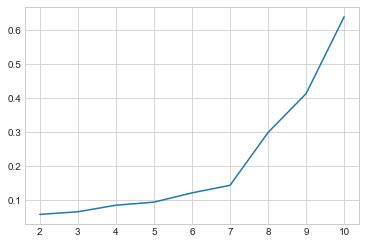

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = list(range(2,11))

ax.plot(x, LABELED_RESULTS)

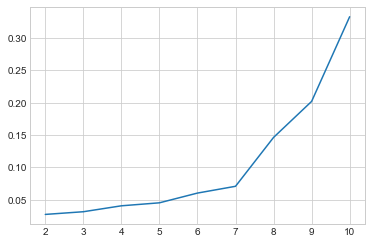

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = list(range(2,11))

ax.plot(x, UNLABELED_RESULTS)